**Mount Drive!**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

**Download Dataset ...**

In [ ]:
import os

os.chdir('drive/My Drive/Pytorch/Dataset/Dermatology')

%ls

 Dermatology/   Geonome/  'Saliency Map'/


In [ ]:
!wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/skin-cancer/test.zip

!unzip test.zip && -rm test.zip

**Import necessary libraries**

In [ ]:
from torchvision import datasets
from torchvision import models
import torchvision
import torch

import time
import glob
import numpy as np
import pandas as pd
from skimage import io
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt

**Get Some sense of data by visualizing it**

In [ ]:
def visulize(names):

  fig, axs = plt.subplots(ncols= len(names), figsize= (15, 15))

  for i in range(len(names)):
    image = torchvision.io.read_image(names[i])
    h, w = image.size()[1], image.size()[2]
    image = torchvision.transforms.ToPILImage(None)(torchvision.transforms.Resize(size= (int(h/4), int(w/4)))(image)) 
    axs[i].imshow(image)
    axs[i].set_title(names[i][8:-17])

In [ ]:
for k in range(5):

  mels = glob.glob('./train/melanoma/*.jpg')
  i_mel = np.random.randint(0, high= len(mels))

  nevuses = glob.glob('./train/nevus/*.jpg')
  i_nev = np.random.randint(0, high= len(nevuses))

  sebs = glob.glob('./train/seborrheic_keratosis/*.jpg')
  i_seb = np.random.randint(0, high= len(sebs))

  names = []
  names = [mels[i_mel], nevuses[i_nev], sebs[i_seb]]

  visulize(names)

print('number of melanoma images is {}'.format(len(mels)))  
print('number of nevus images is {}'.format(len(nevuses)))  
print('number of seborrheic images is {}'.format(len(sebs)))  


**Now it's time to create the dataloader**

In [ ]:
class dermatology_dataset(torch.utils.data.Dataset):

  def __init__(self, path, transform= None):
    super(dermatology_dataset, self).__init__()
    self.names = pd.read_csv(path, sep = '\t')
    self.transform = transform

  def __getitem__(self, idx):
#    image = torchvision.io.read_image(self.names.iloc[idx][0]) 
    image = io.imread(self.names.iloc[idx][0])

    if self.transform:
      image = self.transform(image)

    if 'melanoma' in self.names.iloc[idx][0]:
      label = torch.tensor(0)

    if 'nevus' in self.names.iloc[idx][0]:
      label = torch.tensor(1)

    if 'seborrheic' in self.names.iloc[idx][0]:
      label = torch.tensor(2)  

    return image, label
    
  def __len__(self):
    return len(self.names)  


In [ ]:
names_train_melanoma = glob.glob('./train/melanoma/*.jpg')
names_train_nevus = glob.glob('./train/nevus/*.jpg')
names_train_seborrheic = glob.glob('./train/seborrheic_keratosis/*.jpg')

data_train = {'path': names_train_melanoma + names_train_nevus + names_train_seborrheic}
train_dataframe = pd.DataFrame(data_train)

train_dataframe.to_csv('./train_csv', sep = '\t', index= False)

train_dataframe = pd.read_csv('./train_csv', sep = '\t')

In [ ]:
train_dataframe[1000:2500]

,path
1000,./train/nevus/ISIC_0013007.jpg
1001,./train/nevus/ISIC_0013173.jpg
1002,./train/nevus/ISIC_0013124.jpg
1003,./train/nevus/ISIC_0013048.jpg
1004,./train/nevus/ISIC_0012741.jpg
...,...
1995,./train/seborrheic_keratosis/ISIC_0015181.jpg
1996,./train/seborrheic_keratosis/ISIC_0015295.jpg
1997,./train/seborrheic_keratosis/ISIC_0015220.jpg
1998,./train/seborrheic_keratosis/ISIC_0015260.jpg


In [ ]:
names_val_melanoma = glob.glob('./valid/melanoma/*.jpg')
names_val_nevus = glob.glob('./valid/nevus/*.jpg')
names_val_seborrheic = glob.glob('./valid/seborrheic_keratosis/*.jpg')


data_val = {'path': names_val_melanoma + names_val_nevus + names_val_seborrheic}
val_dataframe = pd.DataFrame(data_val)

val_dataframe.to_csv('./val_csv', sep = '\t', index= False)

val_dataframe = pd.read_csv('./val_csv', sep = '\t')

In [ ]:
val_dataframe

,path
0,./valid/melanoma/ISIC_0012151.jpg
1,./valid/melanoma/ISIC_0012288.jpg
2,./valid/melanoma/ISIC_0013232.jpg
3,./valid/melanoma/ISIC_0012099.jpg
4,./valid/melanoma/ISIC_0012434.jpg
...,...
145,./valid/seborrheic_keratosis/ISIC_0014139.jpg
146,./valid/seborrheic_keratosis/ISIC_0014568.jpg
147,./valid/seborrheic_keratosis/ISIC_0014310.jpg
148,./valid/seborrheic_keratosis/ISIC_0014055.jpg


In [ ]:
names_test_melanoma = glob.glob('./test/melanoma/*.jpg')
names_test_nevus = glob.glob('./test/nevus/*.jpg')
names_test_seborrheic = glob.glob('./test/seborrheic_keratosis/*.jpg')


data_test = {'path': names_test_melanoma + names_test_nevus + names_test_seborrheic}
test_dataframe = pd.DataFrame(data_test)

test_dataframe.to_csv('./test_csv', sep = '\t', index= False)

test_dataframe = pd.read_csv('./test_csv', sep = '\t')

In [ ]:
test_dataframe

,path
0,./test/melanoma/ISIC_0012356.jpg
1,./test/melanoma/ISIC_0012258.jpg
2,./test/melanoma/ISIC_0013321.jpg
3,./test/melanoma/ISIC_0013073.jpg
4,./test/melanoma/ISIC_0013374.jpg
...,...
595,./test/seborrheic_keratosis/ISIC_0014567.jpg
596,./test/seborrheic_keratosis/ISIC_0014634.jpg
597,./test/seborrheic_keratosis/ISIC_0014574.jpg
598,./test/seborrheic_keratosis/ISIC_0014575.jpg


In [ ]:
composed_transform_train = torchvision.transforms.Compose([
                     torchvision.transforms.Resize(size= (195, 195)),
                     torchvision.transforms.RandomRotation(45),
                     torchvision.transforms.RandomVerticalFlip(),
                     torchvision.transforms.RandomHorizontalFlip(),
                     torchvision.transforms.ToTensor(),
                     torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])])

composed_transform_val = torchvision.transforms.Compose([
                     torchvision.transforms.Resize(size= (195, 195)),
                     torchvision.transforms.ToTensor(),
                     torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                      std=[0.229, 0.224, 0.225])])

composed_transform_test = torchvision.transforms.Compose([
                      torchvision.transforms.Resize(size= (195, 195)),
                      torchvision.transforms.ToTensor(),
                      torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                       std=[0.229, 0.224, 0.225])])

In [ ]:
dataset_train = dermatology_dataset('./train_csv', composed_transform_train)
dataset_val = dermatology_dataset('./val_csv', composed_transform_val)
dataset_test = dermatology_dataset('./test_csv', composed_transform_test)

In [ ]:
dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size= 16
                                         , shuffle= True)

dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size= 8)

dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size= 8)

**Becuase of the low speed of the Custom DataLoader let use the built-in one...**

In [ ]:
dataset_train = torchvision.datasets.ImageFolder('./train', transform= composed_transform_train)
dataset_val = torchvision.datasets.ImageFolder('./valid', transform= composed_transform_val)
dataset_test = torchvision.datasets.ImageFolder('./test', transform= composed_transform_test)

In [ ]:
len(dataset_train)

2000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


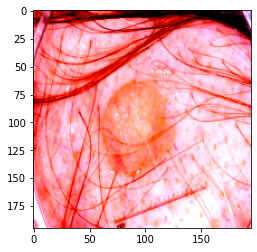

In [ ]:
img, lab = dataset_test[550]
plt.imshow(img.permute(1,2,0))

In [ ]:
lab

2

In [ ]:
batch_size= 16

dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size, shuffle= True)

dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size)

dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size)

**Define the network**

In [ ]:
network = torchvision.models.resnet101(pretrained= True)

class resnet_dermatology(torch.nn.Module):

  def __init__(self, pre_net):
    super(resnet_dermatology, self).__init__()
    self.pre_net = pre_net
    self.linear = torch.nn.Linear(1000, 3)

  def forward(self, x): 
    x = self.pre_net(x)
    x = self.linear(x)
    return x

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


In [ ]:
net = resnet_dermatology(network)
device=  'cuda:0' if torch.cuda.is_available() else 'cpu'
net = net.to(device)

In [ ]:
net((img.unsqueeze(0)/255).to(device))

tensor([[-0.8666, -0.1390, -0.0093]], device='cuda:0', grad_fn=<AddmmBackward>)

**Loss function**

In [ ]:
criteria = torch.nn.CrossEntropyLoss()

opt = torch.optim.Adam(net.parameters(), lr= 0.0001)

**Start Training The Netwotk!**

In [ ]:
start = time.time()

data = iter(dataloader_test)
imgs, labs = next(data)

end = time.time()

print(end-start)

8.662054777145386


In [ ]:
labs

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
len(dataloader_train)

125

In [ ]:
Epochs = 20


for epoch in range(Epochs):

  all_pred_train = []
  all_lab_train = []
  total_loss_train = 0

  for i, data in enumerate(dataloader_train):

    imgs, labs = data
    batch_loss = 0
    imgs = imgs.type(torch.FloatTensor)

    preds = net(imgs.to(device))
    all_lab_train.append(labs)
    all_pred_train.append(preds)

    batch_loss = criteria(preds, labs.to(device))
    batch_score_train = f1_score(labs.detach().cpu().numpy(), torch.argmax(preds, dim= 1).detach().cpu().numpy()
                          , average= 'macro')

    total_loss_train += batch_loss

    opt.zero_grad()
    batch_loss.backward()
    opt.step()

    if (i+1) % 25 == 0:
      print('batch {} / loss {} / F1_score {}'.format(i+1, batch_loss, batch_score_train))

  epoch_score_train = f1_score(torch.cat(all_lab_train).detach().cpu().numpy(), torch.argmax(torch.cat(all_pred_train), dim= 1).detach().cpu().numpy()
                               , average= 'macro')
  
  all_pred_val = []
  all_lab_val = []
  total_loss_val = 0

  for j, data in enumerate(dataloader_val):

    imgs, labs = data
    batch_loss = 0
    imgs = imgs.type(torch.FloatTensor)

    preds = net(imgs.to(device))
    all_lab_val.append(labs)
    all_pred_val.append(preds)

    batch_loss = criteria(preds, labs.to(device))
  
    total_loss_val += batch_loss

  epoch_score_val = f1_score(torch.cat(all_lab_val).detach().cpu().numpy(), torch.argmax(torch.cat(all_pred_val), dim= 1).detach().cpu().numpy()
                               , average= 'macro')
  
  print('\nepoch {} / loss {} / F1_score_train {} / val_loss {} / F1_score_val {} \n '.format(epoch+1, total_loss_train/(i+1)
        , epoch_score_train, total_loss_val/(j+1), epoch_score_val))      


**Training with regularization term...**

In [ ]:
Epochs = 20
lambda_1 = 1e-5
lambda_2 = 1e-4

for epoch in range(Epochs):

  total_loss_train = 0

  for i, data in enumerate(dataloader_train):

    imgs, labs = data
    batch_loss = 0
    imgs = imgs.type(torch.FloatTensor)

    preds = net(imgs.to(device))

    batch_loss = torch.nn.functional.cross_entropy(preds, labs.to(device))

    all_last_linear_resnet_params = torch.cat([x.view(-1) for x in net.pre_net.fc.parameters()])
    all_last_linear_params = torch.cat([x.view(-1) for x in net.linear.parameters()]) 
    l1_regularization = lambda_1 * torch.norm(all_last_linear_resnet_params, 1)
    l2_regularization = lambda_2 * torch.norm(all_last_linear_params, 2)
    
    batch_loss = batch_loss + l1_regularization + l2_regularization

    total_loss_train += batch_loss
    
    opt.zero_grad()
    batch_loss.backward()
    opt.step()

    if (i+1) % 25 == 0:
      print('batch {} / loss {}'.format(i+1, batch_loss))

  total_loss_val = 0

  for j, data in enumerate(dataloader_val):

    imgs, labs = data
    batch_loss = 0
    imgs = imgs.type(torch.FloatTensor)

    preds = net(imgs.to(device))

    batch_loss = torch.nn.functional.cross_entropy(preds, labs.to(device))

    all_last_linear_resnet_params = torch.cat([x.view(-1) for x in net.pre_net.fc.parameters()])
    all_last_linear_params = torch.cat([x.view(-1) for x in net.linear.parameters()]) 
    l1_regularization = lambda_1 * torch.norm(all_last_linear_resnet_params, 1)
    l2_regularization = lambda_2 * torch.norm(all_last_linear_params, 2)
    
    batch_loss = batch_loss + l1_regularization + l2_regularization

    total_loss_val += batch_loss

  print('\n epoch {} / loss {} / val_loss {} \n '.format(epoch+1, total_loss_train/(i+1)
                                                     , total_loss_val/(j+1)))      


**Let's Save the trained model**

In [ ]:
torch.nn.save(net, './dermatology', )

**And now calculate the F1-Score on the test set**

In [ ]:
all_pred_test = []
all_lab_test = []

for j, data in enumerate(dataloader_test):

    imgs, labs = data
    imgs = imgs.type(torch.FloatTensor)

    preds = net(imgs.to(device))

    all_lab_test.append(labs)
    all_pred_test.append(preds)

f1_score(total_labs_test.detach().cpu().numpy(), torch.argmax(torch.cat(total_pred_test), dim= 1).detach().cpu().numpy()
         , average= 'macro')
  

**Saliency Map**

In [ ]:
net.eval()

imgs, labs = data
imgs = imgs[1].unsqueeze(0)
imgs = imgs.type(torch.FloatTensor)
imgs.requires_grad_()

preds = net(imgs.to(device))

max_index = torch.argmax(preds)
max_value = preds[0, max_index]

max_value.backward()

In [ ]:
val, idx = torch.max(imgs.grad.abs(), dim= 1)

val.size()

torch.Size([1, 195, 195])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


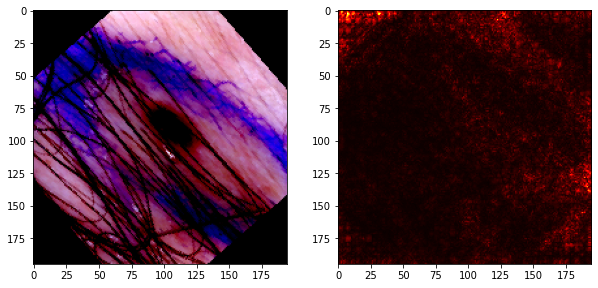

In [ ]:
fig, axs= plt.subplots(nrows= 1, ncols= 2, figsize= (10, 10))

axs[0].imshow(imgs[0].permute(1,2,0).detach().numpy())
axs[1].imshow(val[0], cmap = plt.cm.hot)